<a href="https://colab.research.google.com/github/JeyyGit/Data-Mining/blob/main/part_1/CS246_Colab_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab 0
## Spark Tutorial

In [1]:
!pip install pyspark
!pip install -U -q PyDrive2
#the output 'xxx is not a symbolic link' will not affect your implementation or execution
#to fix 'xxx is not a symbolic link', you can uncomment the lines starting from !mv xxxx
#you may need to replace xxx.11 with the correct version if other errors come up after colab update
#to get the correct version, use !ls /usr/local/lib to find out
!mv /usr/local/lib/libtbbmalloc_proxy.so.2 /usr/local/lib/libtbbmalloc_proxy.so.2.backup
!mv /usr/local/lib/libtbbmalloc.so.2 /usr/local/lib/libtbbmalloc.so.2.backup
!mv /usr/local/lib/libtbbbind_2_5.so.3 /usr/local/lib/libtbbbind_2_5.so.3.backup
!mv /usr/local/lib/libtbb.so.12 /usr/local/lib/libtbb.so.12.backup
!mv /usr/local/lib/libtbbbind_2_0.so.3 /usr/local/lib/libtbbbind_2_0.so.3.backup
!mv /usr/local/lib/libtbbbind.so.3 /usr/local/lib/libtbbbind.so.3.backup
!ln -s /usr/local/lib/libtbbmalloc_proxy.so.2.11 /usr/local/lib/libtbbmalloc_proxy.so.2
!ln -s /usr/local/lib/libtbbmalloc.so.2.11 /usr/local/lib/libtbbmalloc.so.2
!ln -s /usr/local/lib/libtbbbind_2_5.so.3.11 /usr/local/lib/libtbbbind_2_5.so.3
!ln -s /usr/local/lib/libtbb.so.12.11 /usr/local/lib/libtbb.so.12
!ln -s /usr/local/lib/libtbbbind_2_0.so.3.11 /usr/local/lib/libtbbbind_2_0.so.3
!ln -s /usr/local/lib/libtbbbind.so.3.11 /usr/local/lib/libtbbbind.so.3
#If error related to the above execution occurs, you can try commenting out the above 12 lines under pip install PyDrive2 (not included)

# !sudo ldconfig
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=a53ff8249b6382ff8207c3ba2ae8161962e239005d280dca2d79107542b353e1
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.9 MB/s eta 0:00:00
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 32 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 M

Now we authenticate a Google Drive client to download the file we will be processing in our Spark job.

**Make sure to follow the interactive instructions.**

In [2]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("ReadJSONGzip").getOrCreate()

# Define the path to your JSON Gzip file
file_path = "/content/drive/MyDrive/Data/Bombing_Operations.json.gz"

# Read the JSON Gzip file into a DataFrame
bombing_operations_data = spark.read.json(file_path)

# Show the content of the DataFrame
bombing_operations_data.show(truncate=False)

+--------+------------------------+-----------+------------------+-----------+---------------+-------------+------------+----------------------+-------------------+
|AirCraft|ContryFlyingMission     |MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|WeaponType            |WeaponsLoadedWeight|
+--------+------------------------+-----------+------------------+-----------+---------------+-------------+------------+----------------------+-------------------+
|EC-47   |UNITED STATES OF AMERICA|1971-06-05 |NULL              |D          |TAN SON NHUT   |CAMBODIA     |1005.0      |NULL                  |0                  |
|EC-47   |UNITED STATES OF AMERICA|1972-12-26 |NULL              |D          |NAKHON PHANOM  |SOUTH VIETNAM|530.0       |NULL                  |0                  |
|RF-4    |UNITED STATES OF AMERICA|1973-07-28 |NULL              |D          |UDORN AB       |LAOS         |730.0       |NULL                  |0                  |
|A-1     |

In [7]:
# Show general information about the data
bombing_operations_data.printSchema()

root
 |-- AirCraft: string (nullable = true)
 |-- ContryFlyingMission: string (nullable = true)
 |-- MissionDate: string (nullable = true)
 |-- OperationSupported: string (nullable = true)
 |-- PeriodOfDay: string (nullable = true)
 |-- TakeoffLocation: string (nullable = true)
 |-- TargetCountry: string (nullable = true)
 |-- TimeOnTarget: double (nullable = true)
 |-- WeaponType: string (nullable = true)
 |-- WeaponsLoadedWeight: long (nullable = true)



In [8]:
bombing_operations_data.take(3)

[Row(AirCraft='EC-47', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1971-06-05', OperationSupported=None, PeriodOfDay='D', TakeoffLocation='TAN SON NHUT', TargetCountry='CAMBODIA', TimeOnTarget=1005.0, WeaponType=None, WeaponsLoadedWeight=0),
 Row(AirCraft='EC-47', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1972-12-26', OperationSupported=None, PeriodOfDay='D', TakeoffLocation='NAKHON PHANOM', TargetCountry='SOUTH VIETNAM', TimeOnTarget=530.0, WeaponType=None, WeaponsLoadedWeight=0),
 Row(AirCraft='RF-4', ContryFlyingMission='UNITED STATES OF AMERICA', MissionDate='1973-07-28', OperationSupported=None, PeriodOfDay='D', TakeoffLocation='UDORN AB', TargetCountry='LAOS', TimeOnTarget=730.0, WeaponType=None, WeaponsLoadedWeight=0)]

1. `AirCraft`: The type of aircraft involved in the bombing operation (e.g., 'EC-47', 'RF-4').
2. `ContryFlyingMission`: The country that owns or operates the aircraft during the mission (e.g., 'UNITED STATES OF AMERICA').
3. `MissionDate`: The date when the bombing mission took place (e.g., '1971-06-05').
4. `OperationSupported`: Information about any specific military operation supported during the mission (seems to be missing or None in the provided data).
5. `PeriodOfDay`: The period of the day during which the mission occurred (e.g., 'D' for daytime).
6. `TakeoffLocation`: The location from which the aircraft took off for the mission (e.g., 'TAN SON NHUT', 'NAKHON PHANOM', 'UDORN AB').
7. `TargetCountry`: The country targeted during the bombing mission (e.g., 'CAMBODIA', 'SOUTH VIETNAM', 'LAOS').
8. `TimeOnTarget`: The time on target during the mission, measured in minutes (e.g., 1005.0, 530.0, 730.0).
9. `WeaponType`: The type of weapon used during the mission (seems to be missing or None in the provided data).
10. `WeaponsLoadedWeight`: The loaded weight of weapons used during the mission (e.g., 0).


In [11]:
from pyspark.sql.functions import count, desc

country_counts = (bombing_operations_data
                 .groupBy('ContryFlyingMission')
                 .agg(count('*').alias('count'))
                 .orderBy(desc('count')))

# Show the result
country_counts.show(truncate=False)

+------------------------+-------+
|ContryFlyingMission     |count  |
+------------------------+-------+
|UNITED STATES OF AMERICA|3708997|
|VIETNAM (SOUTH)         |622013 |
|LAOS                    |32777  |
|KOREA (SOUTH)           |24469  |
|AUSTRALIA               |12519  |
+------------------------+-------+



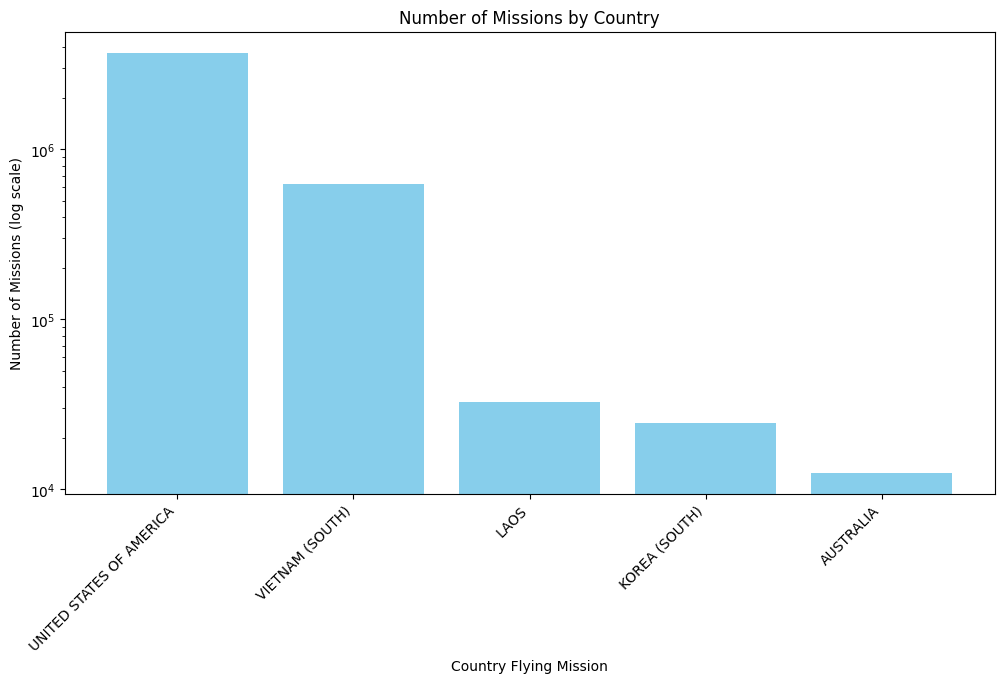

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the PySpark DataFrame to a Pandas DataFrame
pd_country_counts = country_counts.toPandas()

# Plot a bar chart with logarithmic y-axis
plt.figure(figsize=(12, 6))
plt.bar(pd_country_counts['ContryFlyingMission'], pd_country_counts['count'], color='skyblue')
plt.xlabel('Country Flying Mission')
plt.ylabel('Number of Missions (log scale)')
plt.title('Number of Missions by Country')
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
# Create a temporary SQL table
bombing_operations_data.createOrReplaceTempView("missions_table")

# Run a SQL query to count occurrences for each 'ContryFlyingMission' and order by count in descending order
sql_query = """
    SELECT ContryFlyingMission, COUNT(*) AS count
    FROM missions_table
    GROUP BY ContryFlyingMission
    ORDER BY count DESC
"""

country_counts_sql = spark.sql(sql_query)

# Show the result
country_counts_sql.show(truncate=False)

+------------------------+-------+
|ContryFlyingMission     |count  |
+------------------------+-------+
|UNITED STATES OF AMERICA|3708997|
|VIETNAM (SOUTH)         |622013 |
|LAOS                    |32777  |
|KOREA (SOUTH)           |24469  |
|AUSTRALIA               |12519  |
+------------------------+-------+



Let's plot a barchart with the number of missions by country:

Text(0.5, 1.0, 'Number of missions by Country')

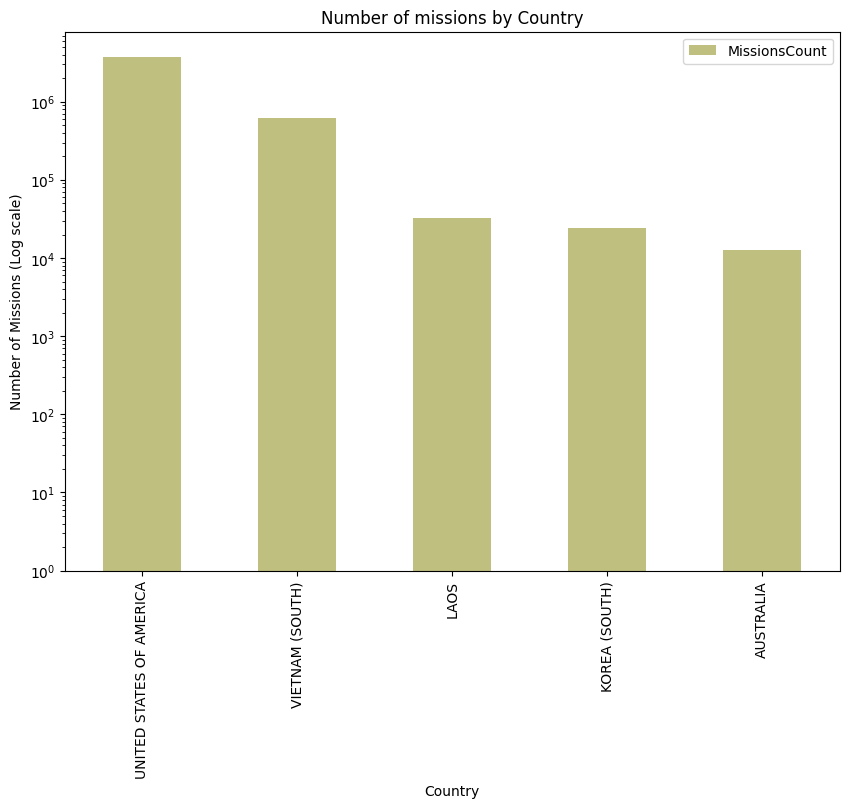

In [ ]:
pl = missions_count_pd.plot(kind="bar",
                            x="ContryFlyingMission", y="MissionsCount",
                            figsize=(10, 7), log=True, alpha=0.5, color="olive")
pl.set_xlabel("Country")
pl.set_ylabel("Number of Missions (Log scale)")
pl.set_title("Number of missions by Country")

In [15]:
# Group by 'MissionDate' and 'ContryFlyingMission' and count occurrences
date_country_counts = (bombing_operations_data
                      .groupBy('MissionDate', 'ContryFlyingMission')
                      .agg(count('*').alias('count'))
                      .orderBy('MissionDate', 'ContryFlyingMission'))

# Show the result
date_country_counts.show(truncate=False)

+-----------+------------------------+-----+
|MissionDate|ContryFlyingMission     |count|
+-----------+------------------------+-----+
|1965-10-01 |UNITED STATES OF AMERICA|447  |
|1965-10-02 |UNITED STATES OF AMERICA|652  |
|1965-10-03 |UNITED STATES OF AMERICA|608  |
|1965-10-04 |UNITED STATES OF AMERICA|532  |
|1965-10-05 |UNITED STATES OF AMERICA|697  |
|1965-10-05 |VIETNAM (SOUTH)         |72   |
|1965-10-06 |UNITED STATES OF AMERICA|689  |
|1965-10-06 |VIETNAM (SOUTH)         |49   |
|1965-10-07 |UNITED STATES OF AMERICA|605  |
|1965-10-07 |VIETNAM (SOUTH)         |50   |
|1965-10-08 |UNITED STATES OF AMERICA|700  |
|1965-10-08 |VIETNAM (SOUTH)         |64   |
|1965-10-09 |UNITED STATES OF AMERICA|677  |
|1965-10-09 |VIETNAM (SOUTH)         |69   |
|1965-10-10 |UNITED STATES OF AMERICA|789  |
|1965-10-10 |VIETNAM (SOUTH)         |59   |
|1965-10-11 |UNITED STATES OF AMERICA|455  |
|1965-10-11 |VIETNAM (SOUTH)         |48   |
|1965-10-12 |UNITED STATES OF AMERICA|449  |
|1965-10-1

In [16]:
# Convert to Pandas DataFrame
pandas_df = date_country_counts.toPandas()

# Convert 'MissionDate' to datetime object
pandas_df['MissionDate'] = pd.to_datetime(pandas_df['MissionDate'])

# Show the Pandas DataFrame
pandas_df.head()

,MissionDate,ContryFlyingMission,count
0,1965-10-01,UNITED STATES OF AMERICA,447
1,1965-10-02,UNITED STATES OF AMERICA,652
2,1965-10-03,UNITED STATES OF AMERICA,608
3,1965-10-04,UNITED STATES OF AMERICA,532
4,1965-10-05,UNITED STATES OF AMERICA,697


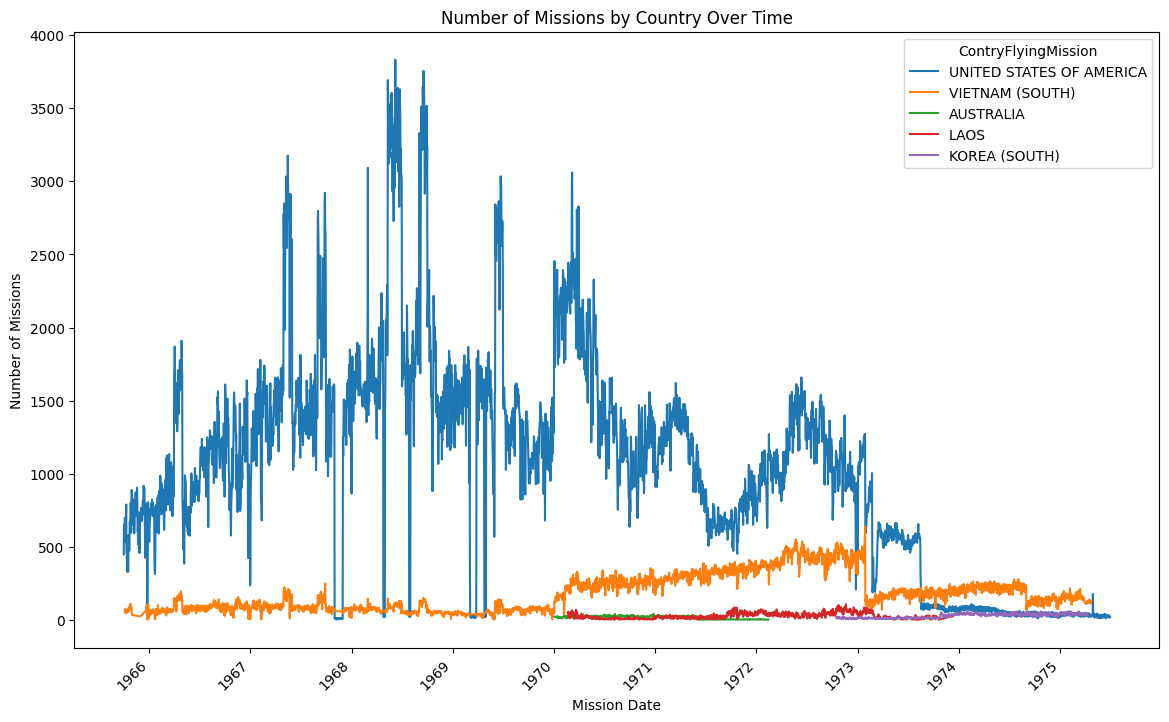

In [17]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.lineplot(x='MissionDate', y='count', hue='ContryFlyingMission', data=pandas_df)
plt.title('Number of Missions by Country Over Time')
plt.xlabel('Mission Date')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
# Filter the data for North Vietnam on the specific date
target_country = 'NORTH VIETNAM'
target_date = '1966-06-29'

result = (bombing_operations_data
          .filter((bombing_operations_data['TargetCountry'] == target_country) &
                  (bombing_operations_data['MissionDate'] == target_date))
          .groupBy('MissionDate', 'ContryFlyingMission')
          .agg(count('*').alias('count')))

# Show the result
result.show(truncate=False)

+-----------+------------------------+-----+
|MissionDate|ContryFlyingMission     |count|
+-----------+------------------------+-----+
|1966-06-29 |VIETNAM (SOUTH)         |6    |
|1966-06-29 |UNITED STATES OF AMERICA|389  |
+-----------+------------------------+-----+



In [20]:
# Cache the result DataFrame
result.cache()

DataFrame[MissionDate: string, ContryFlyingMission: string, count: bigint]

In [21]:
# Group by 'TakeoffLocation' and count occurrences
takeoff_location_counts = (bombing_operations_data
                           .groupBy('TakeoffLocation')
                           .agg(count('*').alias('count'))
                           .orderBy('count', ascending=False))

# Show the result
takeoff_location_counts.show(truncate=False)

+---------------+------+
|TakeoffLocation|count |
+---------------+------+
|BIEN HOA       |492324|
|DANANG         |489942|
|UBON AB        |348822|
|TAN SON NHUT   |311872|
|UDORN AB       |306556|
|CHU LAI        |242096|
|PHAN RANG      |240238|
|TONKIN GULF    |194191|
|NAKHON PHANOM  |194069|
|KORAT          |191081|
|BINH THUY      |144003|
|TUY HOA        |122547|
|PLEIKU         |110322|
|CAM RANH BAY   |96373 |
|U TAPAO        |85041 |
|VTBI           |75873 |
|TAKHLI         |65435 |
|NHA TRANG      |56818 |
|VVPU           |53814 |
|PHU CAT        |50353 |
+---------------+------+
only showing top 20 rows



In [23]:
# Group by 'AirCraft' and count occurrences
most_used_aircraft = (bombing_operations_data
                      .groupBy('AirCraft')
                      .agg(count('*').alias('count'))
                      .orderBy(desc('count'))
                      .limit(5))

# Show the result
most_used_aircraft.show(truncate=False)

+--------+------+
|AirCraft|count |
+--------+------+
|F-4     |909362|
|F-100   |451385|
|A-4     |372975|
|A-1     |358498|
|A-37    |267457|
+--------+------+

